# Data Extraction

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
data = pd.read_csv("titanic.csv",index_col="PassengerId")
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [32]:
print(data.info())
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


# Data Cleaning

to know how many unique values we have.

In [33]:
print(f"Pclass unique values are \n: {data['Pclass'].value_counts()}")

Pclass unique values are 
: 3    491
1    216
2    184
Name: Pclass, dtype: int64


to know how many unique values we have.
then we map two values to 0,1.

In [34]:
print(data["Sex"].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [78]:
data["Sex"] = data["Sex"].map({"male" : 0 , "female":1})

In [79]:
data["Age"]= data["Age"].fillna(0)


to know how many unique values we have.

In [37]:
print(f"Parch unique values are \n: {data['Parch'].value_counts()}")
print(f"SibSp unique values are \n: {data['SibSp'].value_counts()}")
print(f"Ticket unique values are \n: {data['Ticket'].value_counts()}")

Parch unique values are 
: 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
SibSp unique values are 
: 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Ticket unique values are 
: 347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


since name and ticket number doesnt affect result, we delete them.

In [80]:
data = data.drop("Ticket", axis=1)
data = data.drop("Name", axis=1)

In [40]:
print(f"Embarked unique values are \n: {data['Embarked'].value_counts()}")

Embarked unique values are 
: S    644
C    168
Q     77
Name: Embarked, dtype: int64


to know how many unique values we have.
then we map three values to 1,2,3.

In [81]:
data["Embarked"] = data["Embarked"].map({"S" : 1 , "C" : 2 , "Q" : 3})

In [86]:
data["Cabin"].fillna(0)
data["Cabin"] = data["Cabin"].notna().astype(int)

# plot

## simple plot

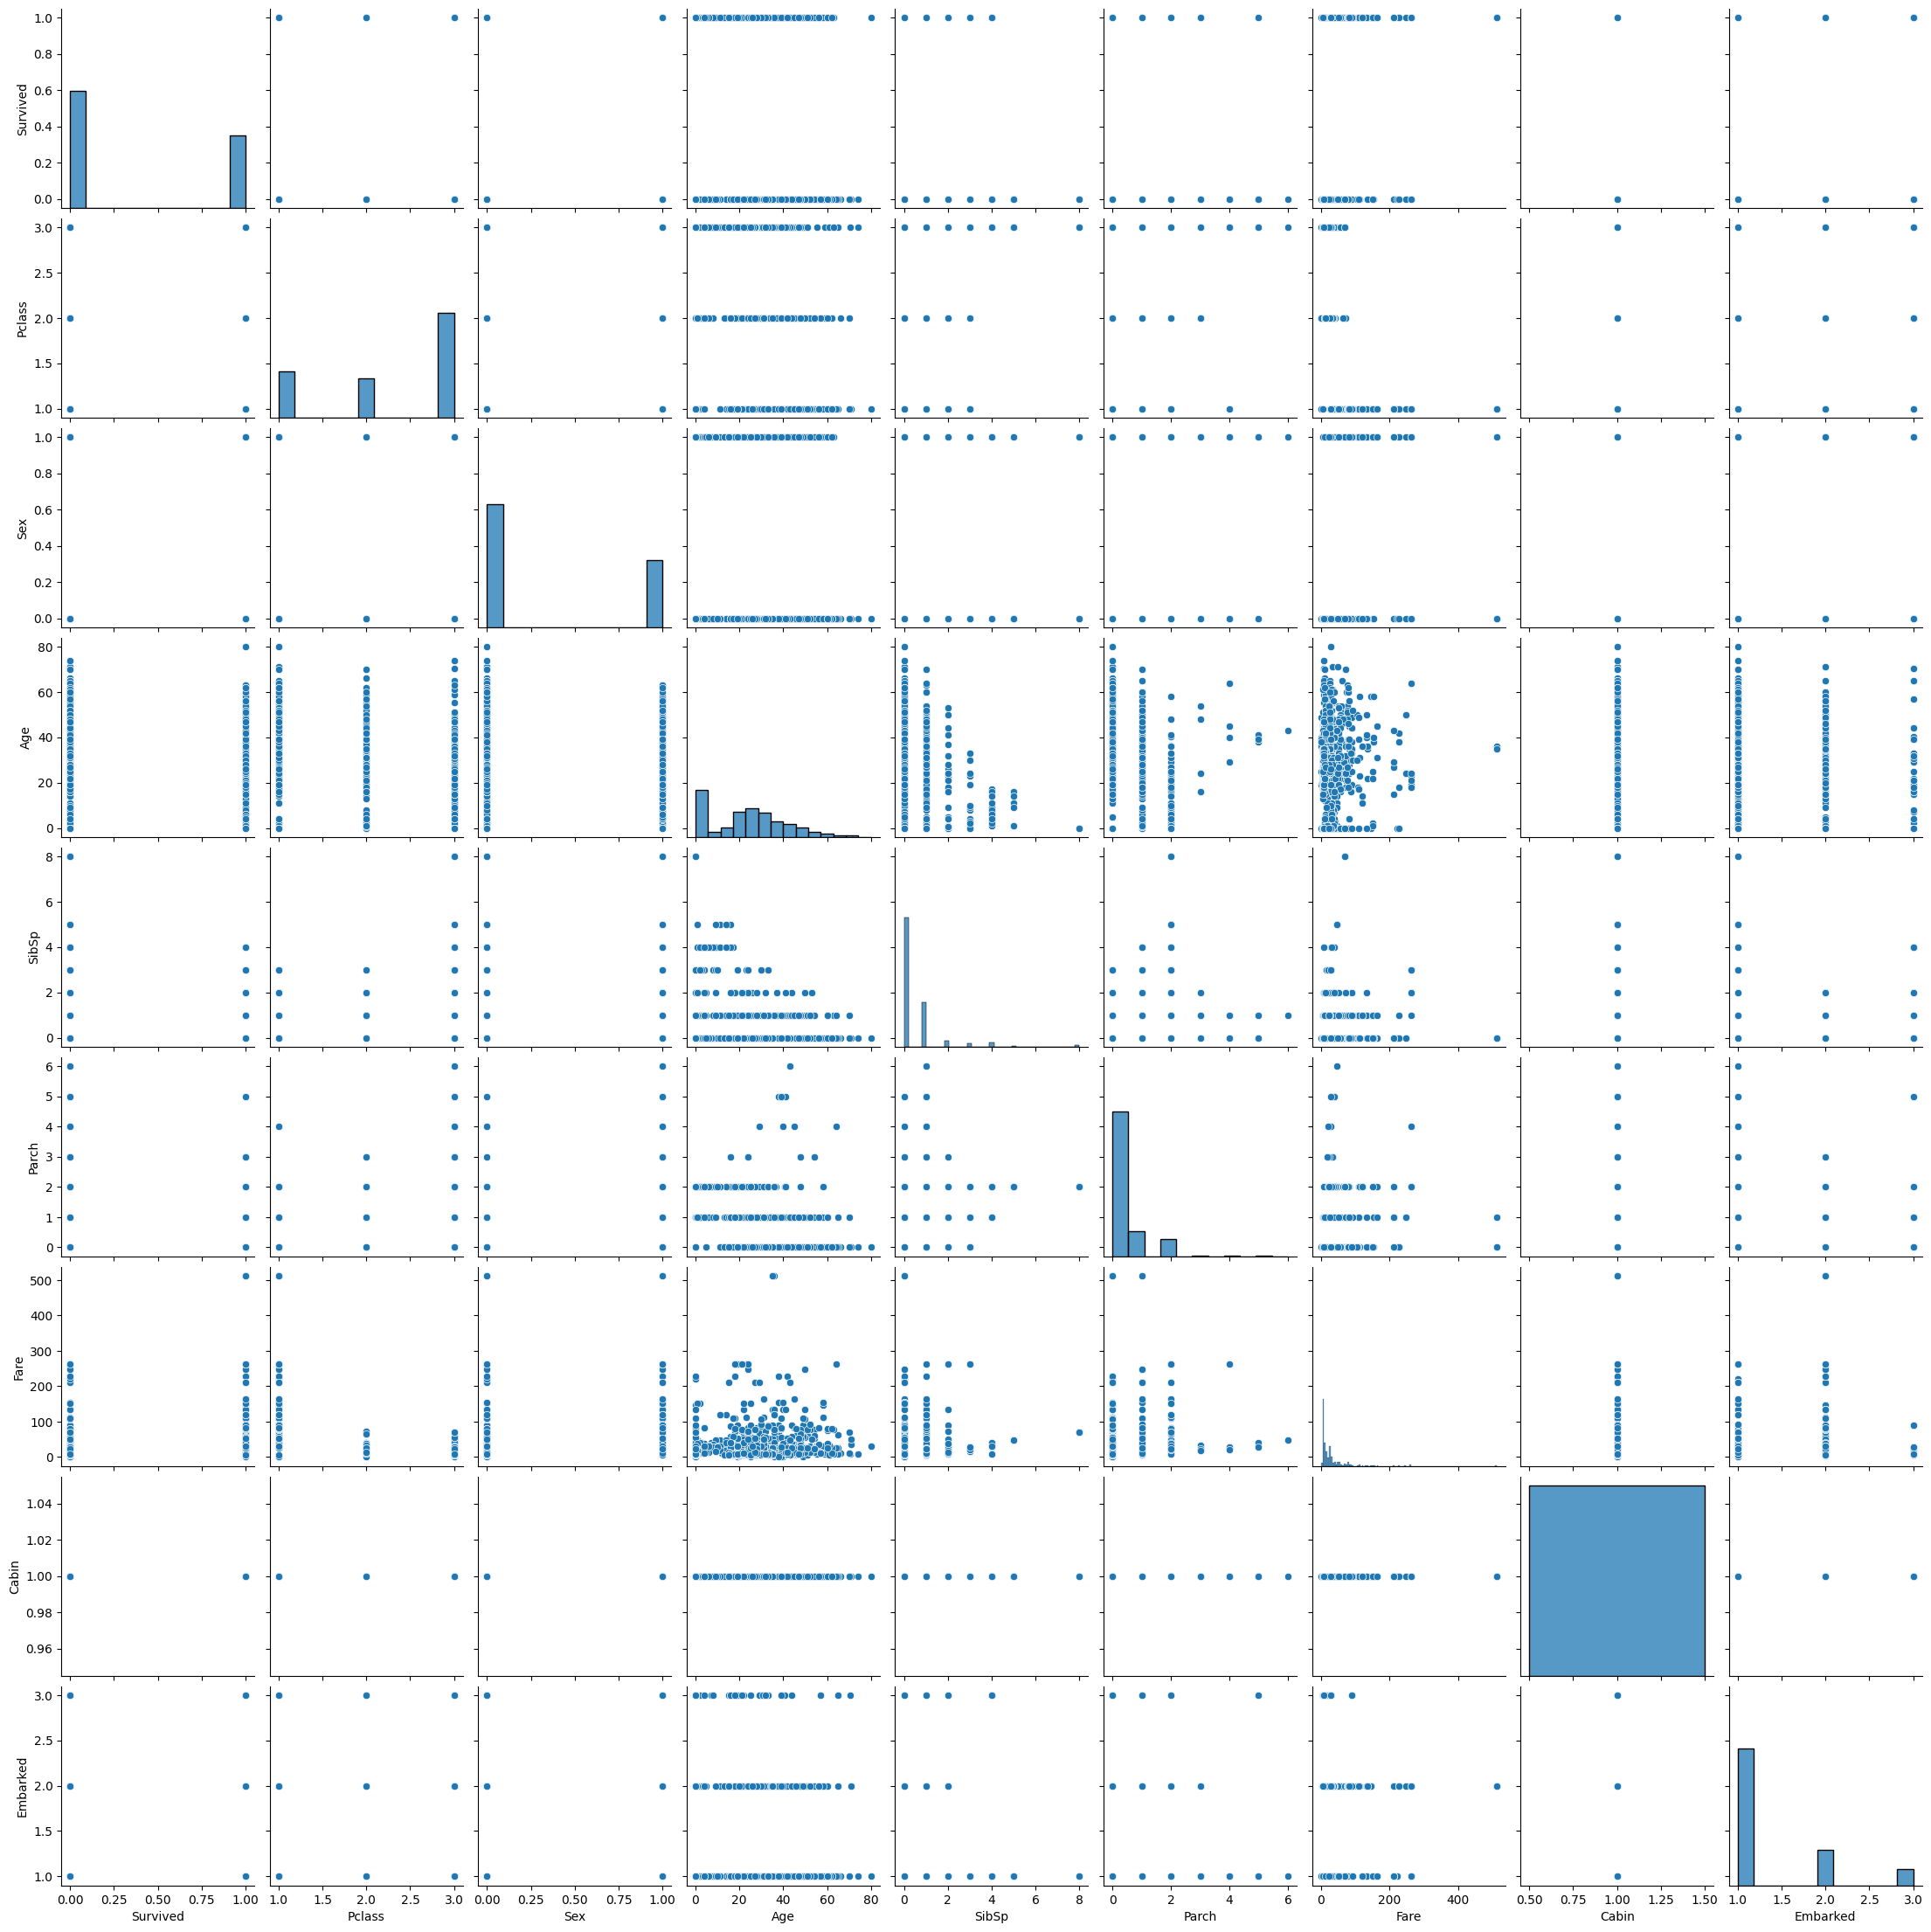

In [87]:
sns.pairplot(data)
plt.show()

men survivor are more than female survivors

In [88]:
data["Survived"].value_counts()



0    549
1    342
Name: Survived, dtype: int64

## based on sex

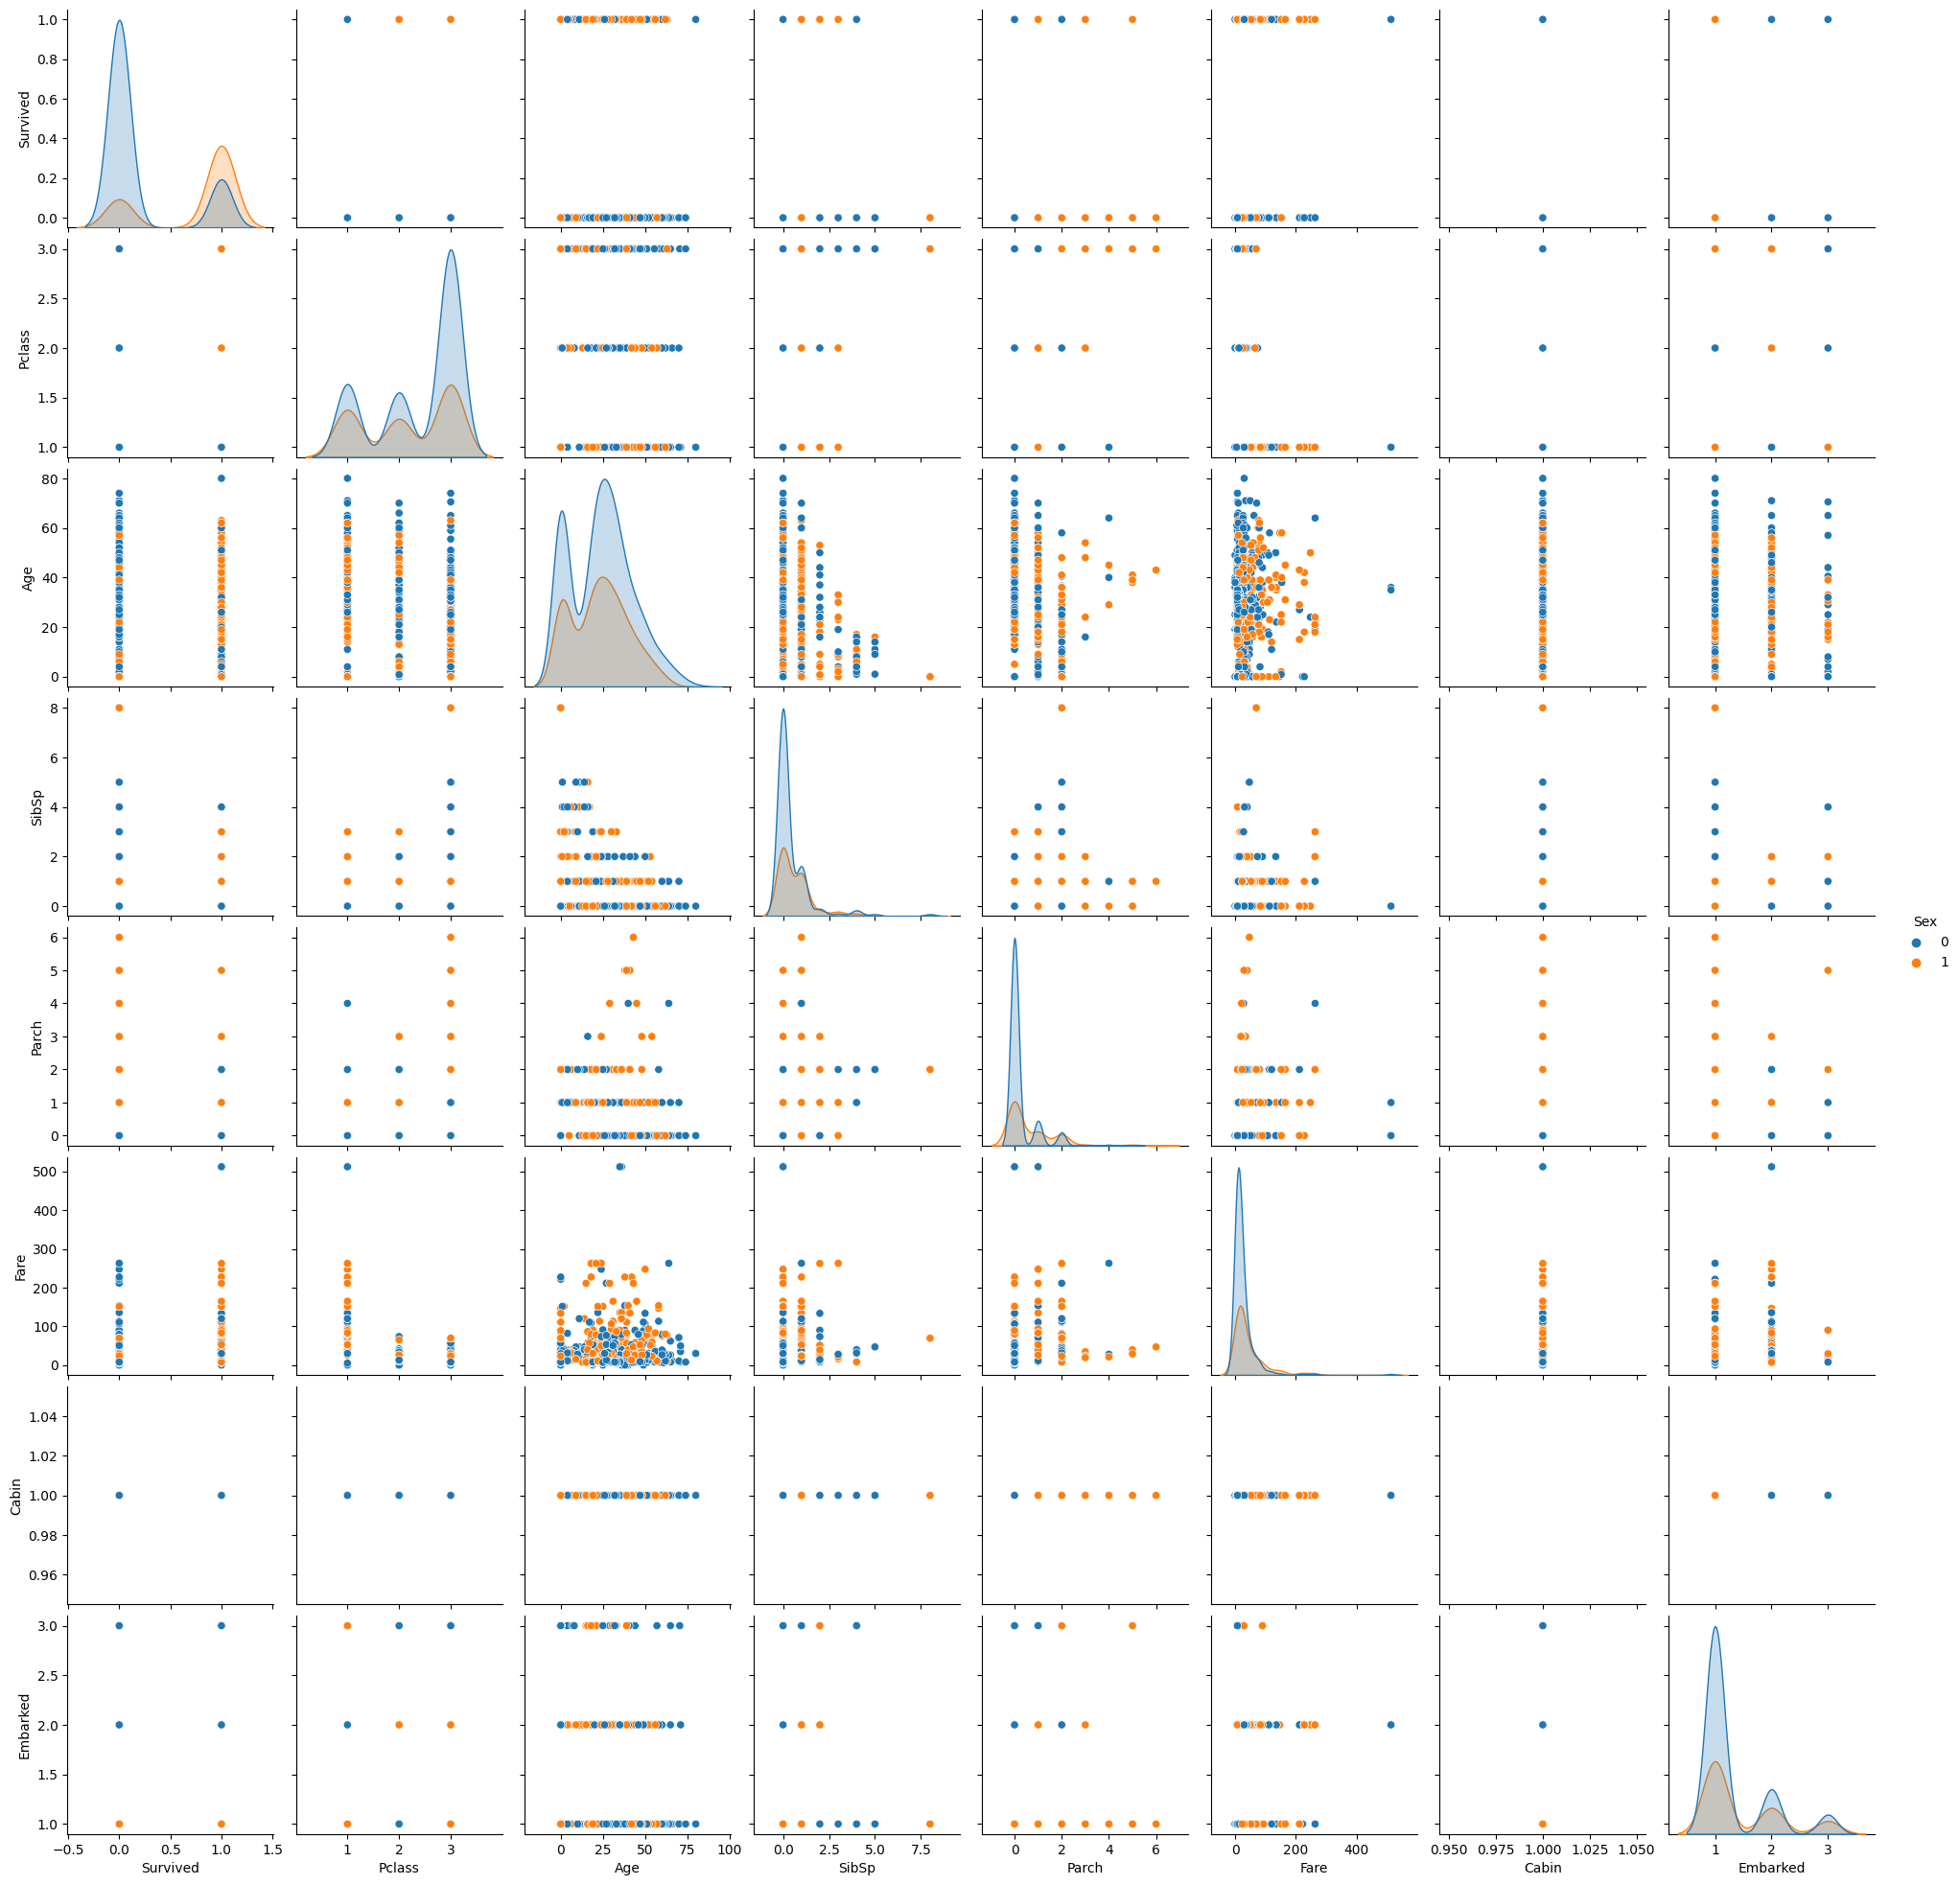

In [89]:
sns.pairplot(data, hue="Sex")
plt.show()

men who didnt survived are more than women who didnt survived.
men who survived are less than women who survived.

In [90]:
print (data[data["Survived"] == 0]["Sex"].value_counts())
print(data[data["Survived"] == 1]["Sex"].value_counts())

0    468
1     81
Name: Sex, dtype: int64
1    233
0    109
Name: Sex, dtype: int64


in Pclass 3 , there is more men.

In [91]:
data[data["Pclass"] == 3]["Sex"].value_counts()

0    347
1    144
Name: Sex, dtype: int64

men have larger age range than women.

In [92]:
data.groupby("Sex")["Age"].agg(["min", "max"])

,min,max
Sex,,
0,0.0,80.0
1,0.0,63.0


there is no man who is man over 40 whose Parch is more than 3.
there is no man whose Parch is over 4. ==> every one with Parch > 5 is woman. 

In [93]:
count_sex0 = len(data[(data["Sex"] == 0) & (data["Parch"] > 4) & (data["Age"] > 40)])
count_sex1 = len(data[(data["Sex"] == 0) & (data["Parch"] > 5)])
count_all  = len(data[data["Parch"] < 4])
print(count_sex0,count_sex1, count_all)


0 0 881


the person with max Fare is man.

In [94]:
data.loc[data["Fare"].idxmax(), "Sex"]

1

## based on Embarked

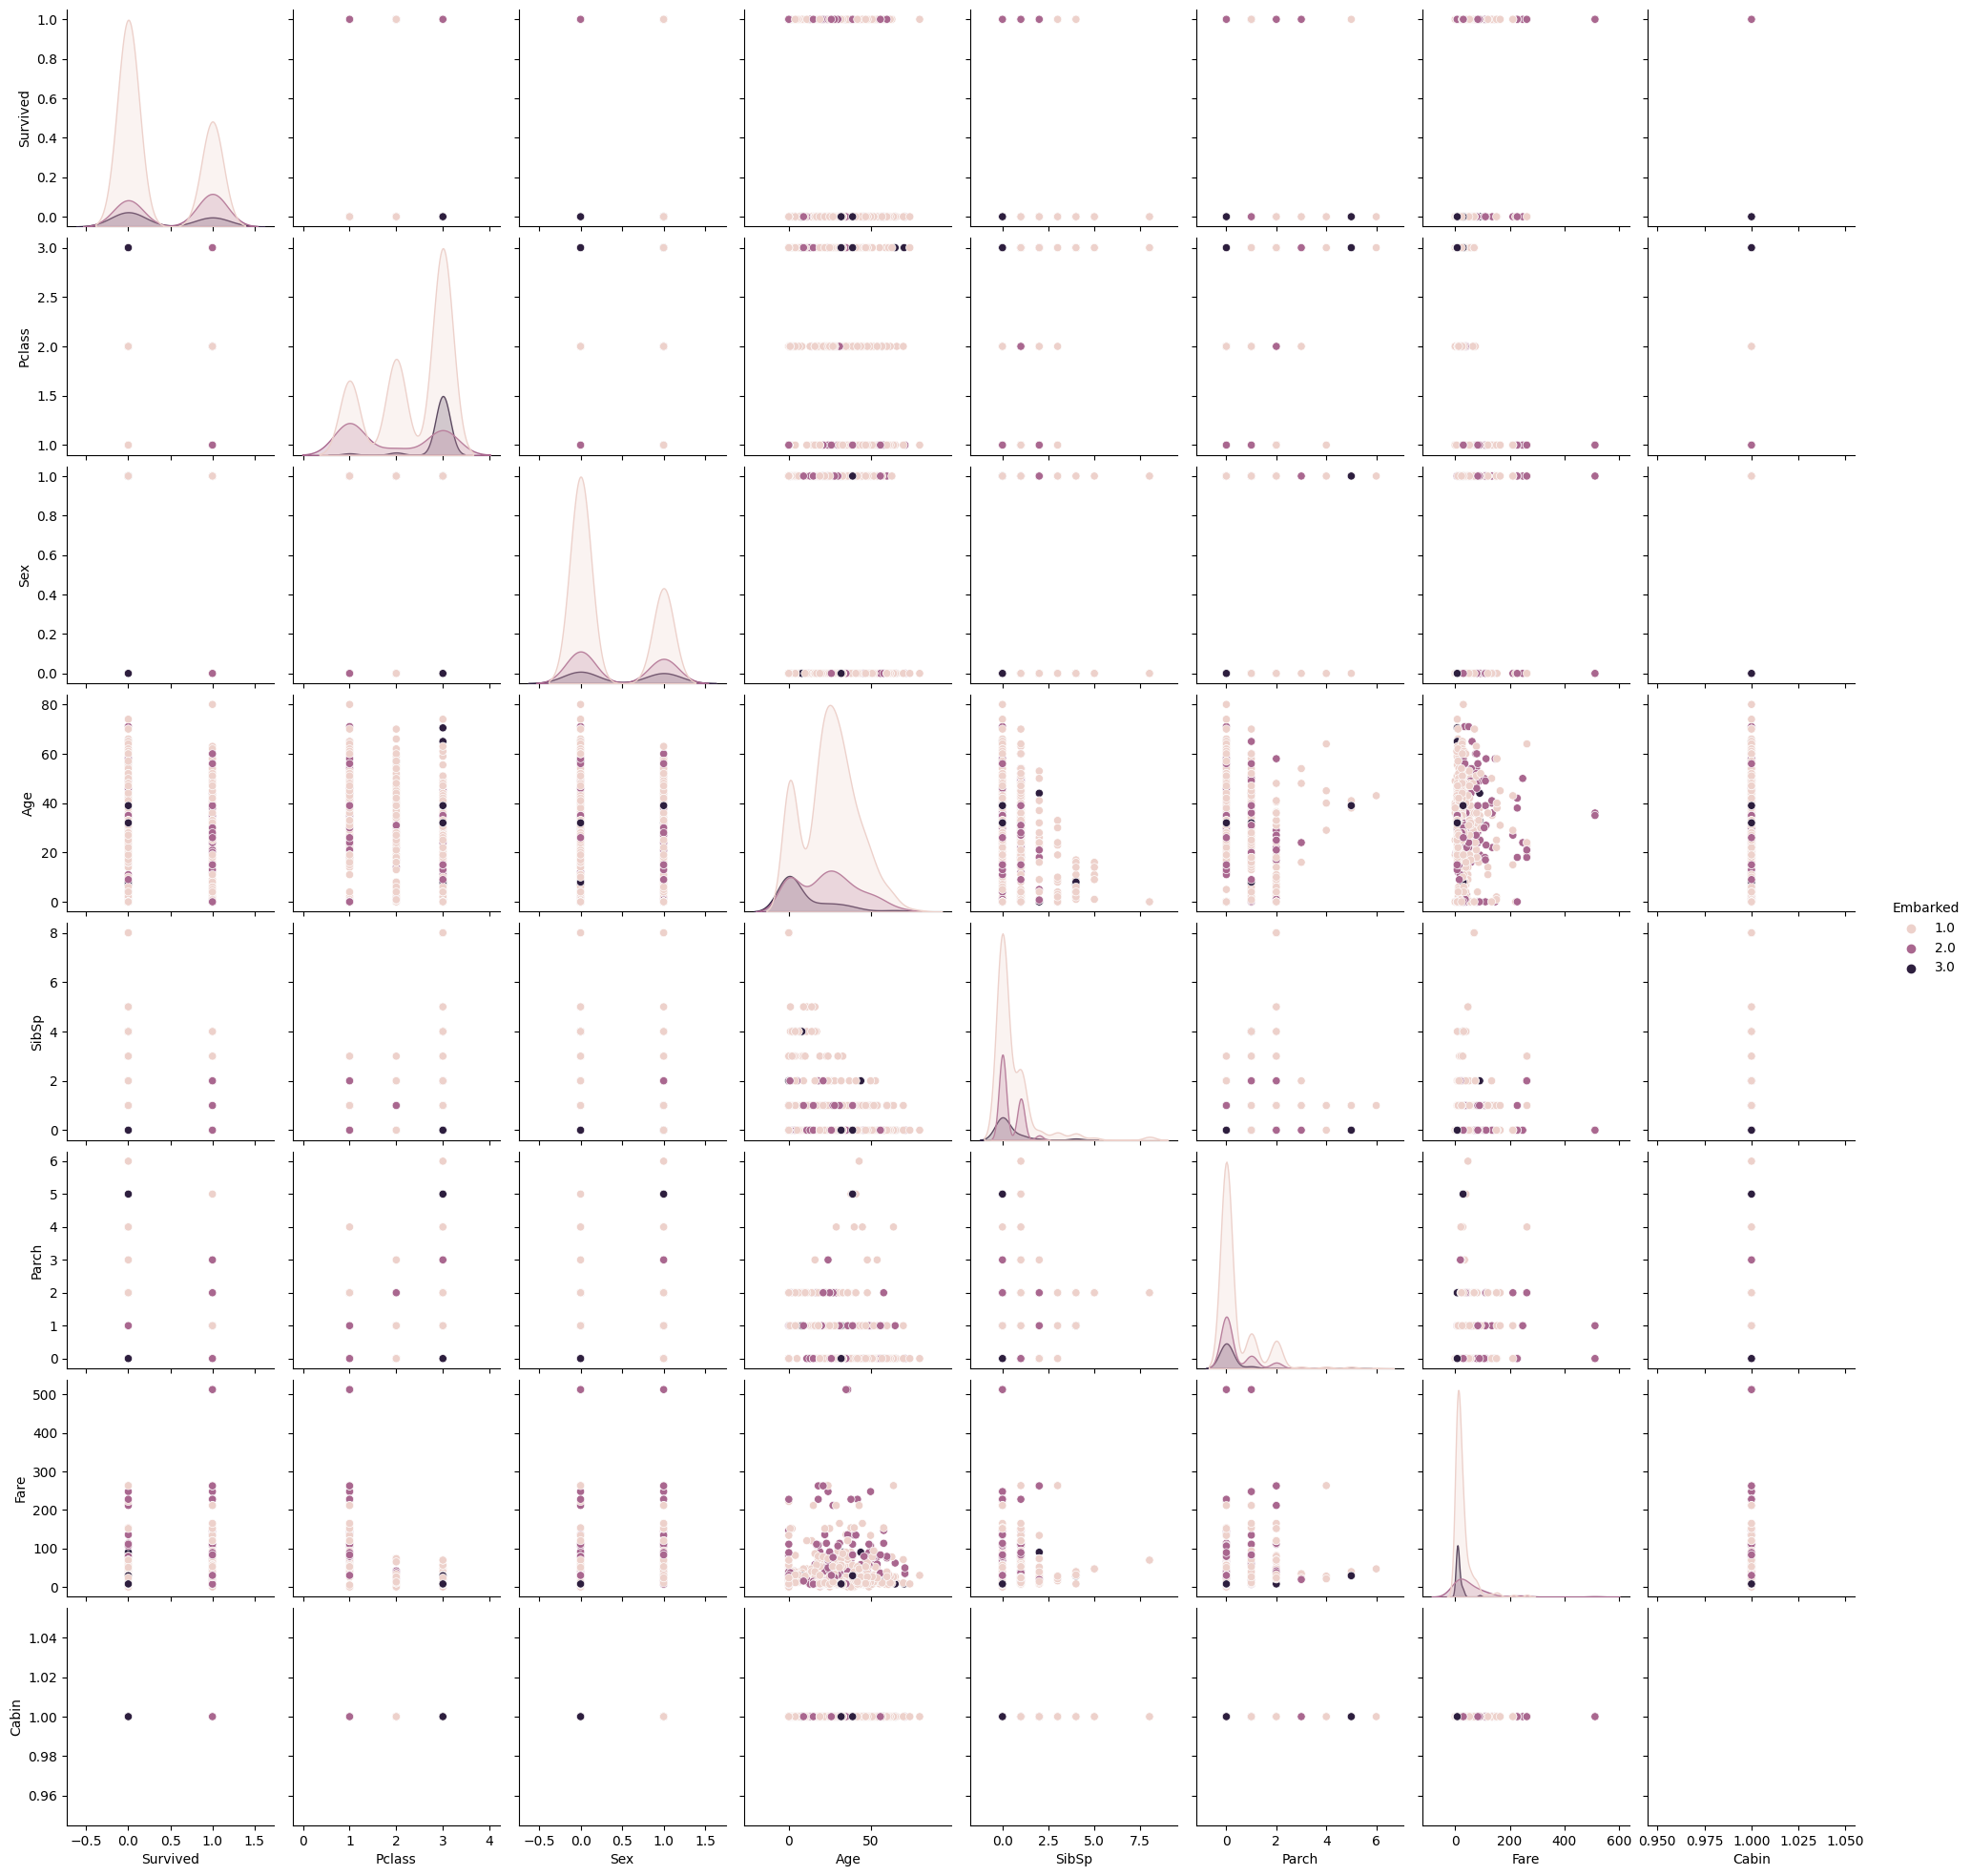

In [53]:
sns.pairplot(data, hue="Embarked")
plt.show()

most men are in embarked 3.

In [70]:
print(data[(data["Sex"] == 0) & (data["Embarked"] == 3)].shape[0])
print(data[(data["Sex"] == 0) & (data["Embarked"] == 2)].shape[0])
print(data[(data["Sex"] == 0) & (data["Embarked"] == 1)].shape[0])

41
95
441


the person who paid most fare is in embarked 2.

In [73]:
data.loc[data["Fare"].astype(int).idxmax(), "Embarked"]


2.0